## «Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>
ДЗ в рамках курса Нетологии "Data Scientist: от 0 до middle"

In [246]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  
import seaborn as sns

## Задание № 1. Вам даны результаты проверки двух препаратов.

Требуется:

    Оценить, есть ли различие в эффекте у этих пациентов?
    Визуально подтвердить результат

A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.

**Гипотезы**:

- H0 - различия в эффектах от применения препаратов незначительны
- H1 - различия в эффектах от применения препаратов значительны

Statistics=0.023, p=0.982
Различия в эффектах от применения разных препаратов незначительны (не отвергаем H0)


(0.022710084131950473, 0.9819111298330054)

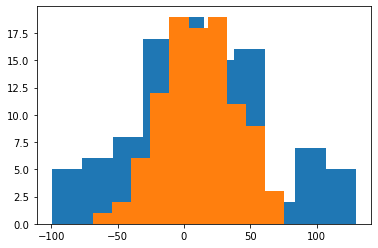

In [247]:
#Генерация выборок
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = stats.norm.rvs(scale=54, loc=11, size=100)

statistic, pvalue = stats.ttest_ind(A, B, equal_var = False) # применяем тест Стьюдента для независимых выборок
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))


#Интерпретация
alpha = 0.05   # Уровень значимости
if pvalue > alpha:
    print('Различия в эффектах от применения разных препаратов незначительны (не отвергаем H0)')
else:
    print('Различия в эффектах от применения разных препаратов значительны (отвергаем H0)')

#Визуализация
plt.hist(B)
plt.hist(A)
statistic, pvalue

In [248]:
#Посмотрим, что скажет тест Манна-Уитни
from scipy.stats import mannwhitneyu

#Сравнение групп
stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретация
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=4948.000, p=0.450
Одинаковые распределения (не отвергаем H0)


## Задание № 2. Вам даны результаты проверки двух препаратов.

Требуется:

    Оценить, есть ли различие в эффекте у этих пациентов?
    Визуально подтвердить результат

А - группа людей без препарата.

B - та же группа людей, но получающая препарат.


**Гипотезы**:

- H0 - различия в эффекте от применения и неприменения препарата незначительны
- H1 - различия в эффекте от применения и неприменения препарата значительны

Statistics=1930.000, p=0.041
Различия в эффекте от применения и неприменения препарата значительны (отвергаем H0)


(1930.0, 0.04077572901549266)

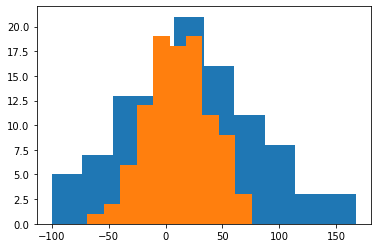

In [249]:
#Генерация выборок
np.random.seed(11)
C = stats.norm.rvs(scale=30, loc=11, size=100)
D = C + stats.norm.rvs(scale=54, loc=11, size=100)

statistic, pvalue = wilcoxon(C, D) # применяем тест Уилкоксона для зависимых выборок
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))


#Интерпретация
if pvalue > alpha:
    print('Различия в эффекте от применения и неприменения незначительны (не отвергаем H0)')
else:
    print('Различия в эффекте от применения и неприменения препарата значительны (отвергаем H0)')



#Визуализация
plt.hist(D)
plt.hist(C)
statistic, pvalue

In [250]:
#Посмотрим, что скажет тест Стьюдента для зависимых выборок
statistic, pvalue = stats.ttest_rel(C, D) # применяем тест Стьюдента для зависимых выборок
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))


#Интерпретация
if pvalue > alpha:
    print('Различия в эффекте от применения и неприменения незначительны (не отвергаем H0)')
else:
    print('Различия в эффекте от применения и неприменения препарата значительны (отвергаем H0)')


Statistics=-2.170, p=0.032
Различия в эффекте от применения и неприменения препарата значительны (отвергаем H0)


## Задание № 3. Допустим вы решили устроить дачный эксперимент. 
   
Берем и поливаем одни огурцы водой, другие огурцы водой с удобрением, 
третью группу огурцов будем поливать минералкой.

Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения 
по сравнению с минералкой?
Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist


**Гипотезы**:

- H0 - различия в эффектах от применения разных веществ незначительны
- H1 - хотя бы одно вещество дает значимый эффект 

In [251]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

from scipy.stats import f_oneway # импортируем функцию для дисперсионного анализа из библиотеки scipy пакета stats

F, pvalue = f_oneway(water, nutri, mineral)  # дисперсионный анализ 
print(F, pvalue)   # Смотрим на результаты 

if pvalue > alpha:
    print('Различия в эффектах от применения разных веществ незначительны (не отвергаем H0)')
else:
    print('Хотя бы одно вещество дает значимый эффект  (отклоняем H0)')
    
    

12.525963044834192 2.9240047906326866e-05
Хотя бы одно вещество дает значимый эффект  (отклоняем H0)


In [252]:
#посмотрим, что скажет критерий Уилкоксона

from scipy.stats import wilcoxon 
stat, p = wilcoxon(nutri, mineral)
print(stat, p)

if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')


16.5 0.00019741058349609375
Разные распределения (отвергаем H0)


(array([3., 0., 6., 0., 0., 4., 0., 5., 0., 2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

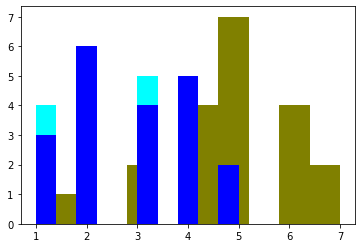

In [253]:
#Визуализация
df = pd.DataFrame(list(zip(water, nutri, mineral)), columns =[ 'water','nutri', 'mineral']) 

plt.hist(nutri, color = 'olive')
plt.hist(mineral, color = 'cyan')
plt.hist(water, color = 'blue')



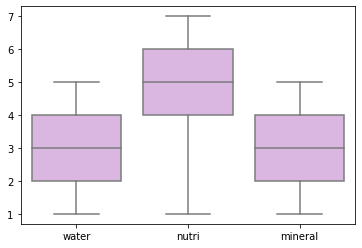

In [254]:
ax = sns.boxplot(data = df, color='#dfb0e8')


**Исходя из графика, можно сделать вывод, что эффект от удобрения значительнее, чем от воды и минералки. При этом, моэно предположить, что эффекты от минералки и от воды практически не различаются.**

## Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры. 

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков. 

In [255]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

**Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.**

*Замечание:*
приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. 


In [256]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [257]:
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


**Игроки, которым установили ворота на уровне 30, чаще возвращались к игре через 7 дней после установки и в течение первой недели после установки. Однако игроки, которым установили ворота на уровне 40, чуть чаще возвращались к игре через 1 день после установки и в общем сыграли чуть больше раундов.**

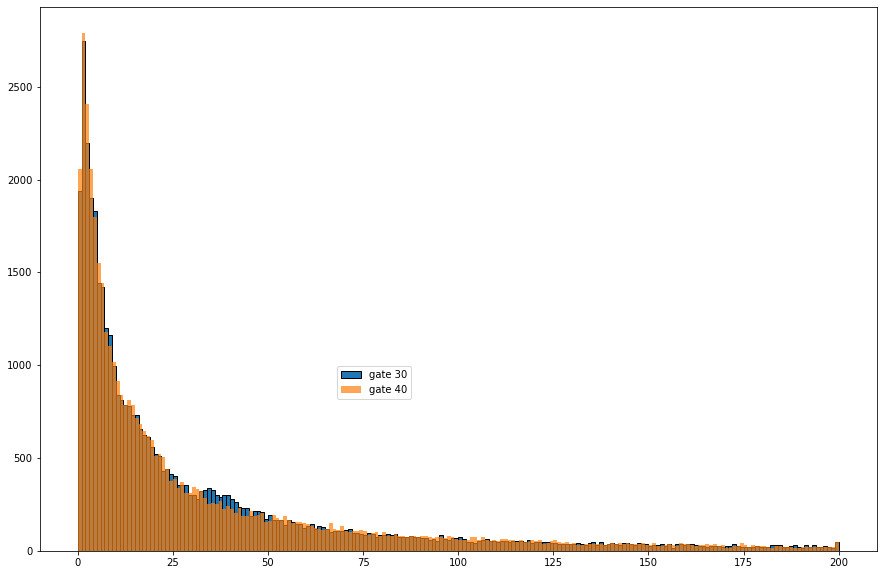

In [16]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Исходя их графика, можно предположить,что частота игр у игроков, для которых ворота установлены на уровне 30, несколько выше, однако нельзя утверждать однозначно.**

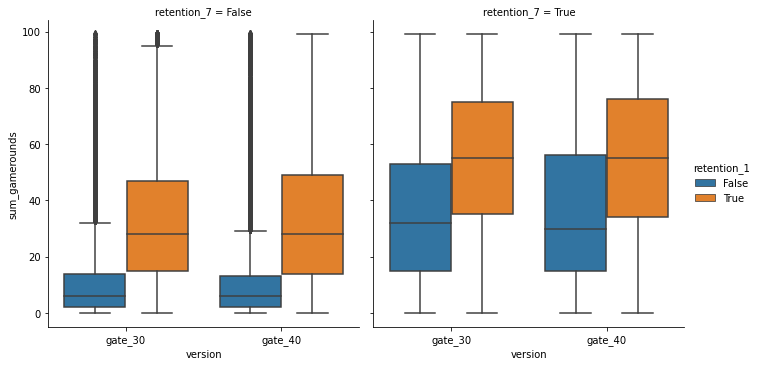

In [229]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


**Из данных графиков, кажется, что различия в частоте игр между разными группами игроков несущественны.**

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

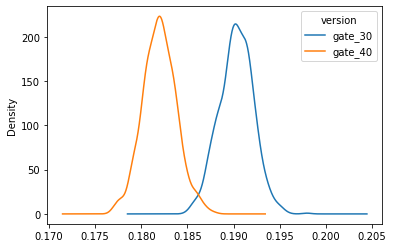

In [215]:
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
#Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
#A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

**С помощью метода бутстрап можно наглядно обнаружить, что различия между группами все же статистически значимы.**

In [258]:
#А теперь посмотрим, что скажут статтесты
g_30 = data.query("version == 'gate_30' and retention_7 == True")
g_40 = data.query("version == 'gate_40' and retention_7 == True")


statistic, pvalue = stats.kruskal(g_30['sum_gamerounds'], g_40['sum_gamerounds']) # H - критерий Краскела-Уоллеса
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))

#Интерпретация
if pvalue > alpha:
    print('Различия незначительны (не отвергаем H0)')
else:
    print('Различия значительны (отвергаем H0)')

Statistics=6.551, p=0.010
Различия значительны (отвергаем H0)


In [259]:
#посмотрим, что говорит тест Манна-Уитни в общем случае
#Сравнение групп
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds']) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретация
if p > alpha:
    print('Различия незначительны (не отвергаем H0)')
else:
    print('Различия значительны (отвергаем H0)')

Statistics=1009027049.500, p=0.025
Различия значительны (отвергаем H0)


In [260]:
#А теперь посмотрим на дисперсионный анализ в общем случае
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

# Интерпретация
if p > alpha:
    print('Различия незначительны (не отвергаем H0)')
else:
    print('Различия значительны (отвергаем H0)')
    

Различия незначительны (не отвергаем H0)


In [261]:
#И в случае, когда нас интересуют игроки, которые вернулись спустя 7 дней
f, p = f_oneway(g_30['sum_gamerounds'], g_40['sum_gamerounds'])

# Интерпретация
if p > alpha:
    print('Различия незначительны (не отвергаем H0)')
else:
    print('Различия значительны (отвергаем H0)')

Различия незначительны (не отвергаем H0)


Получается, что в данном примере дисперсионный анализ может обмануть

# Покемоны и AB-тестирование 

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [262]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()


#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [263]:
pokemon.rename(columns={'Class 1': 'Class_1', 'Class 2': 'Class_2'}, inplace=True)

## Задание № 1:

Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, 
чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их.
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

**Гипотезы**:

- H0 - различия в силе атак покемонов классов grass и rock незначительны
- H1 - различия в силе атак покемонов классов grass и rock значительны


In [264]:
#Поиск покемонов, которые относятся к обоим классам
pokemon.query("Class_1 in ['Grass', 'Rock'] and Class_2 in ['Grass', 'Rock']")


,pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
377,378,Lileep,Rock,Grass,66,41,77,61,87,23,False
378,379,Cradily,Rock,Grass,86,81,97,81,107,43,False


In [265]:
#Исключаем покемонов, которые относятся к обоим классам
pokemon1 = pokemon.drop(pokemon.index[[377, 378]])

In [266]:
A = pokemon1.query("Class_1 == 'Grass' or Class_2 == 'Grass'")['Attack']
B = pokemon1.query("Class_1 == 'Rock' or Class_2 == 'Rock'")['Attack']

#Сравнение групп
stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретация
if p > alpha:
    print('Различия в силе атак покемонов классов grass и rock незначительны (не отвергаем H0)')
else:
    print('Различия в силе атак покемонов классов grass и rock значительны (отвергаем H0)')

Statistics=1816.500, p=0.001
Различия в силе атак покемонов классов grass и rock значительны (отвергаем H0)


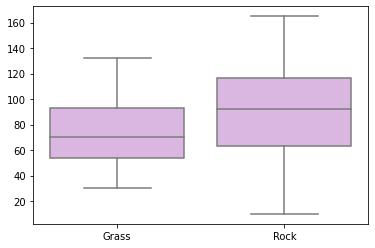

In [267]:
#Визуализация
df = pd.DataFrame(list(zip(A, B)), columns =['Grass','Rock']) 
ax = sns.boxplot(data = df, color='#dfb0e8')


**Исходя из графика можно предположить, что профессор Оук ошибся и покемоны в классе rock имеют более сильную обычную атаку, 
чем покемоны в классе grass.**

## Задание № 2:


Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, 
а правда, что покемоны что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal.
Проверьте, прав ли он, и убедите его в своем выводе статистически.

*Примечание:* если есть покемоны относятся к обоим классам, выбросьте их;

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

**Гипотезы**:

- H0 - различия в скорости покемонов классов Water и Normal незначительны
- H1 - различия в скорости покемонов классов Water и Normal значительны




In [268]:
pokemon.query("Class_1 in ['Water', 'Normal'] and Class_2 in ['Water', 'Normal']")

,pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
445,446,Bibarel,Normal,Water,79,85,60,55,60,71,False


In [269]:
#Исключаем покемонов, которые относятся к обоим классам
pokemon2 = pokemon.drop(pokemon.index[[445]])

In [270]:
C = pokemon1.query("Class_1 == 'Water' or Class_2 == 'Water'")['Speed']
D = pokemon1.query("Class_1 == 'Normal' or Class_2 == 'Normal'")['Speed']

#Сравнение групп

statistic, pvalue = stats.ttest_ind(C, D, equal_var = False) # применяем тест Стьюдента для независимых выборок
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))


#Интерпретация
if pvalue > alpha:
    print('Различия в скорости покемонов классов Water и Normal незначительны (не отвергаем H0)')
else:
    print('Различия в скорости покемонов классов Water и Normal значительны (отвергаем H0)')


Statistics=-2.103, p=0.037
Различия в скорости покемонов классов Water и Normal значительны (отвергаем H0)


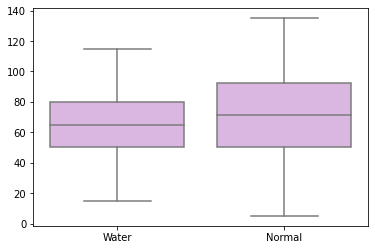

In [271]:
#Визуализация
df = pd.DataFrame(list(zip(C, D)), columns =['Water','Normal']) 
ax = sns.boxplot(data = df, color='#dfb0e8')

**Исходя из графика можно предположить, что профессор Оук ошибся и покемоны окемоны в классе Normal в среднем более быстрые, чем покемоны в классе Water.**


## Задание № 3:

Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професcор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

**Гипотезы**:

- H0 - различия в скорости покемонов, принимающих и непринимающих вакцину, незначительны
- H1 - различия в скорости покемонов, принимающих и непринимающих вакцину, значительны


In [272]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
E = pokemon.query("Name in @treathed_pokemon")['Speed']

# Покемоны, которые не принимали сыворотку увеличения скорости
F = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon)]['Speed']

In [273]:
#Сравнение групп
stat, p = mannwhitneyu(E, F) # U-тест Манна-Уитни

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретация
if p > alpha:
    print('Различия в скорости покемонов, принимающих и непринимающих вакцину, незначительны (не отвергаем H0)')
else:
    print('Различия в скорости покемонов, принимающих и непринимающих вакцину, значительны (отвергаем H0)')

Statistics=19.500, p=0.000
Различия в скорости покемонов, принимающих и непринимающих вакцину, значительны (отвергаем H0)


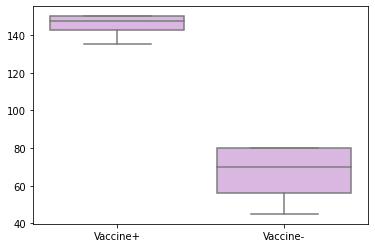

In [274]:
#Визуализация
dt = pd.DataFrame(list(zip(E, F)), columns =['Vaccine+','Vaccine-']) 
#ax = sns.catplot(data=dt, color='#dfb0e8')
ax = sns.boxplot(data=dt, color='#dfb0e8')

**На графике наглядно видно, что скорость у покемонов, принимающих вакцину, значительно выше скорости покемонов, не принимающих вакцину, а значит можно предположить, что вакцина работает.**

## Задание № 4:

Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

**Гипотезы**:

- H0 - различия в характеристиках легендарных и нелегендарных покемонов незначительны
- H1 - различия в характеристиках легендарных и нелегендарных покемонов значительны


In [275]:
pokemon = pokemon.assign(Sum = pokemon.HP + pokemon.Attack + pokemon.Defense)
pokemon = pokemon.assign(Сomposition = pokemon.HP * pokemon.Attack * pokemon.Defense)
pokemon

,pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Сomposition
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


In [276]:
legendary_pokemon = pokemon[pokemon['Legendary'] == True]
ordinary_pokemon = pokemon[~pokemon['Legendary'] == True]

In [277]:
#Будем использовать непараметрический тест -  H-критерий Краскела-Уоллеса, который невосприимчив к выбросам
#Сравнение групп покемонов по сумме характеристик
statistic, pvalue = stats.kruskal(legendary_pokemon['Sum'], ordinary_pokemon['Sum'])
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))

#Интерпретация
if pvalue > alpha:
    print('Различия в сумме характеристик легендарных и нелегендарных покемонов незначительны (не отвергаем H0)')
else:
    print('Различия в сумме характеристик легендарных и нелегендарных покемонов значительны (отвергаем H0)')

Statistics=105.165, p=0.000
Различия в сумме характеристик легендарных и нелегендарных покемонов значительны (отвергаем H0)


In [278]:
#Сравнение групп покемонов по произведению характеристик
statistic, pvalue = stats.kruskal(legendary_pokemon['Сomposition'], ordinary_pokemon['Сomposition'])
print('Statistics=%.3f, p=%.3f' % (statistic, pvalue))

#Интерпретация
if pvalue > alpha:
    print('Различия в произведении характеристик легендарных и нелегендарных покемонов незначительны (не отвергаем H0)')
else:
    print('Различия в произведении характеристик легендарных и нелегендарных покемонов значительны (отвергаем H0)')

Statistics=103.255, p=0.000
Различия в произведении характеристик легендарных и нелегендарных покемонов значительны (отвергаем H0)


In [279]:
#Для сравнения средних значений покемонов разных групп подчистим выбросы через межквартальный размах
legendary_pokemon_stat = legendary_pokemon.describe()

#Расчет границ для определения выбросов среди легендарных покемонов
legendary_pokemon_stat.loc['lower_bound ',] = legendary_pokemon_stat.loc['25%', ] - 1.5*(legendary_pokemon_stat.loc['75%', ] - (legendary_pokemon_stat.loc['25%', ]))
legendary_pokemon_stat.loc['upper_bound ',] = legendary_pokemon_stat.loc['75%', ] + 1.5*(legendary_pokemon_stat.loc['75%', ] - (legendary_pokemon_stat.loc['25%', ]))

legendary_pokemon_stat

#Ищем выбросы среди легендарных покемонов
remove_outliers = legendary_pokemon[legendary_pokemon['Sum'].between(legendary_pokemon_stat.loc['lower_bound ','Sum'], legendary_pokemon_stat.loc['upper_bound ','Sum'], inclusive=True)].sort_values('Sum')

pd.concat([legendary_pokemon, remove_outliers]).drop_duplicates(keep=False)

,pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Сomposition
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,True,440,2880000


In [280]:
remove_outliers = legendary_pokemon[legendary_pokemon['Сomposition'].between(legendary_pokemon_stat.loc['lower_bound ','Сomposition'], legendary_pokemon_stat.loc['upper_bound ','Сomposition'], inclusive=True)].sort_values('Сomposition')

pd.concat([legendary_pokemon, remove_outliers]).drop_duplicates(keep=False)


,pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Сomposition
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,True,440,2880000


In [281]:
#Ищем выбросы среди обычных покемонов
ordinary_pokemon_stat = ordinary_pokemon.describe()

#Расчет границ для определения выбросов 
ordinary_pokemon_stat.loc['lower_bound ',] = ordinary_pokemon_stat.loc['25%', ] - 1.5*(ordinary_pokemon_stat.loc['75%', ] - (ordinary_pokemon_stat.loc['25%', ]))
ordinary_pokemon_stat.loc['upper_bound ',] = ordinary_pokemon_stat.loc['75%', ] + 1.5*(ordinary_pokemon_stat.loc['75%', ] - (ordinary_pokemon_stat.loc['25%', ]))

ordinary_pokemon_stat
remove_outliers = ordinary_pokemon[ordinary_pokemon['Sum'].between(ordinary_pokemon_stat.loc['lower_bound ','Sum'], ordinary_pokemon_stat.loc['upper_bound ','Sum'], inclusive=True)].sort_values('Sum')

pd.concat([ordinary_pokemon, remove_outliers]).drop_duplicates(keep=False)


,pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Сomposition
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,False,430,2156250
268,269,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,False,414,2460000
313,314,Slaking,Normal,NaN,150,160,100,95,65,100,False,410,2400000
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,False,440,2254000


In [282]:
remove_outliers = ordinary_pokemon[ordinary_pokemon['Сomposition'].between(ordinary_pokemon_stat.loc['lower_bound ','Сomposition'], ordinary_pokemon_stat.loc['upper_bound ','Сomposition'], inclusive=True)].sort_values('Сomposition')
remove_outliers
remove_op_comp = pd.concat([ordinary_pokemon, remove_outliers]).drop_duplicates(keep=False)
remove_op_comp
#pid_remove_op_comp = remove_op_comp['pid'].to_numpy()
#pid_remove_op_comp

,pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Сomposition
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False,330,1248000
87,88,Mega Slowbro,Water,Psychic,95,75,180,130,80,30,False,350,1282500
120,121,Rhydon,Ground,Rock,105,130,120,45,45,40,False,355,1638000
124,125,Mega Kangaskhan,Normal,NaN,105,125,100,60,100,100,False,330,1312500
137,138,Mega Pinsir,Bug,Flying,65,155,120,65,90,105,False,340,1209000
141,142,Mega Gyarados,Water,Dark,95,155,109,70,130,81,False,359,1605025
223,224,Steelix,Steel,Ground,75,85,200,55,65,30,False,360,1275000
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,False,430,2156250
229,230,Mega Scizor,Bug,Steel,70,150,140,65,100,75,False,360,1470000
232,233,Mega Heracross,Bug,Fighting,80,185,115,40,105,75,False,380,1702000


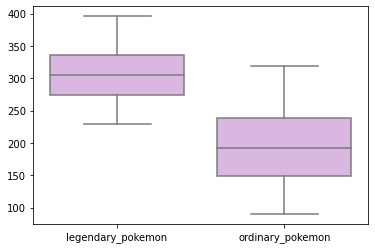

In [283]:
#Исключаем выброс
legendary_pokemon = legendary_pokemon[~legendary_pokemon['pid'].isin([425])]
ordinary_pokemon = ordinary_pokemon[~ordinary_pokemon['pid'].isin([225,269,314,334])]

#Визуализация для сравнения средних значений по сумме характеристик
df = pd.DataFrame(list(zip(legendary_pokemon['Sum'], ordinary_pokemon['Sum'])), columns =['legendary_pokemon','ordinary_pokemon'])  
ax = sns.boxplot(data = df, color='#dfb0e8')

In [285]:
#Исключаем выброс
legendary_pokemon = legendary_pokemon[~legendary_pokemon['pid'].isin([425])]
ordinary_pokemon = ordinary_pokemon[~ordinary_pokemon['pid'].isin(pid_remove_op_comp)]


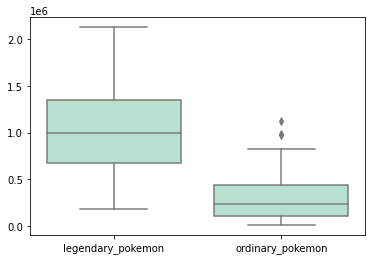

In [287]:
#Визуализациядля сравнения средних значений по произведению характеристик
df = pd.DataFrame(list(zip(legendary_pokemon['Сomposition'], ordinary_pokemon['Сomposition'])), columns =['legendary_pokemon','ordinary_pokemon'])  
ax = sns.boxplot(data = df, color='#b0e8d0')

**Исходя из статистических тестов и графиков можно сделать вывод, что сумма и произведение характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов**